In [177]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
from pyproj import CRS
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [178]:
data = pd.read_csv('data/atlantic_cleaned.csv')

In [179]:
lag_steps = 5  # Number of lag steps to consider
for lag in range(1, lag_steps + 1):
    data[f'Latitude_lag_{lag}'] = data['Latitude'].shift(lag)
    data[f'Longitude_lag_{lag}'] = data['Longitude'].shift(lag)

# Drop rows with NaN values resulting from lag features
data.dropna(inplace=True)

In [180]:
X = data[[f'Latitude_lag_{lag}' for lag in range(1, lag_steps + 1)] +
         [f'Longitude_lag_{lag}' for lag in range(1, lag_steps + 1)]]
y = data[['Latitude', 'Longitude']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

best_params = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
model = RandomForestRegressor(**best_params, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4, n_estimators=300, random_state=42)

In [181]:
# evaluating model
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

RMSE: 5.471231122075541


In [182]:
initial_data = {
    'Latitude': [
        14.1, 14.7, 15.4, 16.0, 16.4, 16.6, 16.8, 17.0, 17.3, 17.6
    ],
    'Longitude': [
        -39.4, -40.0, -41.0, -42.3, -43.5, -44.8, -46.1, -46.9, -47.8, -48.6
    ]
}

# Actual hurricane path data for Hurricane Delta in a dictionary
actual_data = {
    'Latitude': [
        14.1, 14.7, 15.4, 16.0, 16.4, 16.6, 16.8, 17.0, 17.3, 17.6, 18.1, 18.5, 19.0, 19.3, 19.6, 19.9, 20.3, 20.9, 21.5, 21.7, 21.9, 22.7, 23.8, 24.4, 25.1, 26.2, 27.1, 28.1, 29.3, 30.4, 31.3, 32.4, 33.6, 34.9, 36.3, 37.4, 38.5, 40.6, 43.1, 45.5, 46.4, 47.6, 48.6, 49.2, 49.8, 50.0, 49.7, 49.5, 49.8, 50.6, 52.5, 54.6, 56.6, 58.2, 59.6, 60.9, 62.0, 62.6, 63.0, 63.0, 63.0, 62.0
    ],
    'Longitude': [
        -39.4, -40.0, -41.0, -42.3, -43.5, -44.8, -46.1, -46.9, -47.8, -48.6, -49.7, -50.6, -51.3, -51.9, -52.6, -53.3, -54.3, -55.7, -57.1, -58.8, -60.1, -61.0, -62.3, -63.2, -64.0, -64.6, -65.3, -65.9, -66.1, -66.2, -66.2, -65.7, -65.0, -64.1, -63.2, -61.9, -60.2, -57.9, -56.3, -55.6, -54.0, -51.3, -48.3, -45.2, -42.6, -39.6, -35.8, -31.7, -27.5, -23.9, -21.0, -20.5, -20.5, -20.5, -20.6, -21.2, -22.5, -24.5, -26.5, -29.0, -31.4, -34.0
    ]
}

In [183]:


n = 20  # Number of points to predict
predictions = []

# Use initial_data as a starting point
current_data = initial_data

for _ in range(n):
    # Create lag features for the current_data
    lag_features = []
    for lag in range(1, lag_steps + 1):
        lag_features.extend([current_data['Latitude'][-lag], current_data['Longitude'][-lag]])

    # Predict the next point
    next_point = model.predict(np.array(lag_features).reshape(1, -1))

    # Append the predicted point to the predictions list
    predictions.append(next_point[0])

    # Update current_data with the new point
    current_data['Latitude'].append(next_point[0][0])
    current_data['Longitude'].append(next_point[0][1])
    

# Create a DataFrame to store the predicted path
predicted_path_df = pd.DataFrame(predictions, columns=['Latitude', 'Longitude'])





print("Predicted Latitude and Longitude:")
print(predicted_path_df)

c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature 

Predicted Latitude and Longitude:
     Latitude  Longitude
0   17.626347 -48.236280
1   17.528714 -49.029730
2   17.393251 -49.209806
3   17.332613 -48.898170
4   17.354103 -49.578642
5   17.352708 -49.619189
6   17.390777 -49.444617
7   17.477564 -50.474015
8   17.492493 -50.503499
9   17.373716 -49.672314
10  17.545516 -51.328645
11  17.564223 -51.307212
12  17.493329 -50.483102
13  17.603628 -52.063539
14  17.677471 -52.031739
15  17.801030 -51.327753
16  18.174327 -53.258071
17  18.391651 -53.212088
18  18.298094 -51.803828
19  18.551427 -54.424351


c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\colin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature 

C:\Users\colin\AppData\Local\Temp\ipykernel_2948\2730449548.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


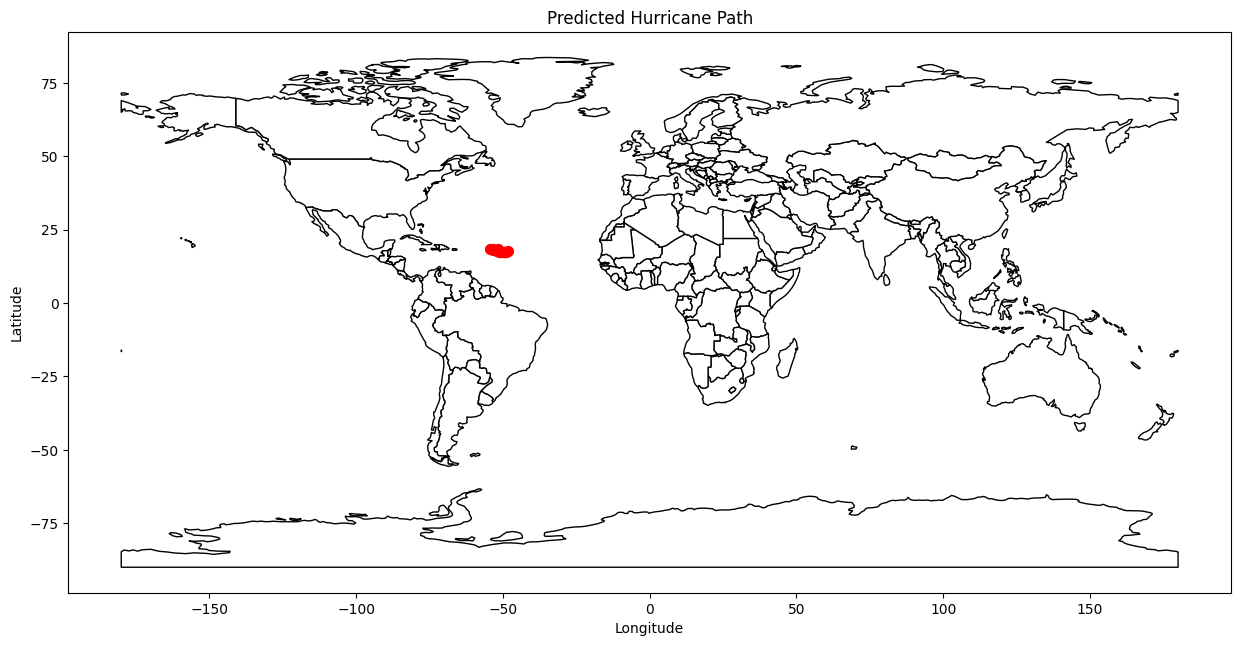

In [184]:
predicted_path_df['geometry'] = predicted_path_df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
gdf = gpd.GeoDataFrame(predicted_path_df, geometry='geometry')

# basic world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='red', marker='o', markersize=50)  # Plotting the predicted path

plt.title('Predicted Hurricane Path')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\colin\AppData\Local\Temp\ipykernel_2948\41932263.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


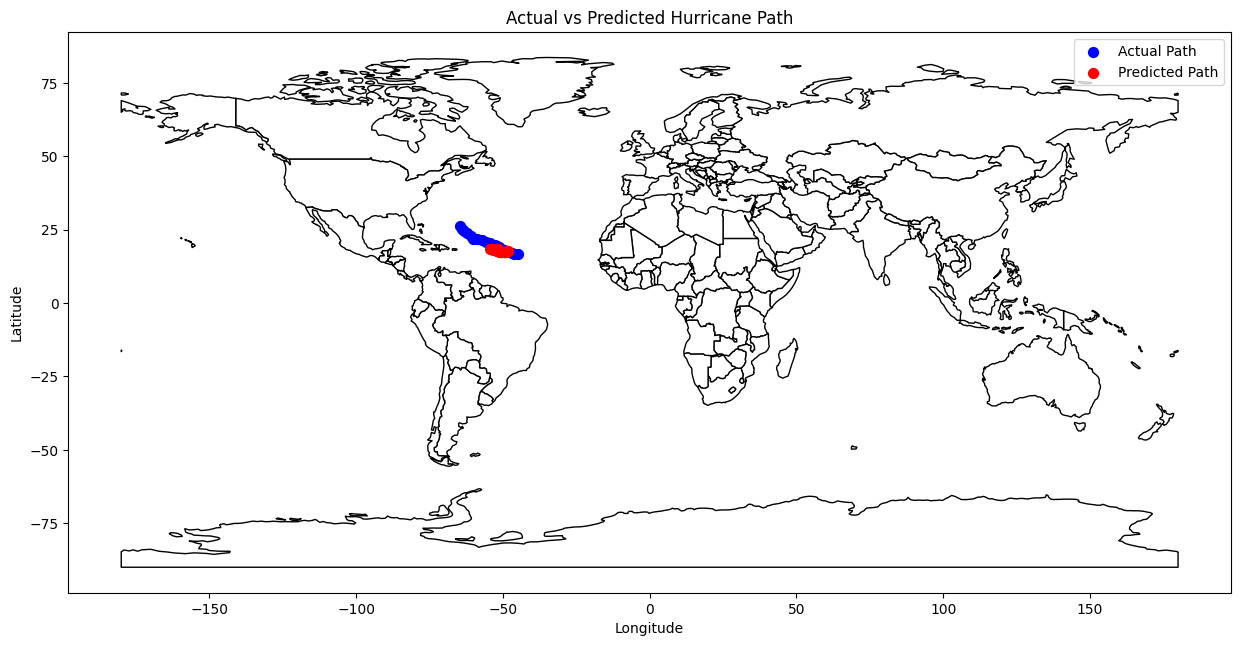

In [185]:
actual_path_df = pd.DataFrame(actual_data, columns=['Latitude', 'Longitude'])


actual_path_df['geometry'] = actual_path_df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
gdf_actual = gpd.GeoDataFrame(actual_path_df, geometry='geometry')

# Basic world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='white', edgecolor='black')
gdf_actual.plot(ax=ax, color='blue', marker='o', markersize=50, label='Actual Path')  # Plotting the actual path
gdf.plot(ax=ax, color='red', marker='o', markersize=50, label='Predicted Path')  # Plotting the predicted path



plt.title('Actual vs Predicted Hurricane Path')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [36]:
# prepare data for SVC classification by removing some of the dataframe columns

atlantic_svc = data.drop(['ID', 'Name', 'Event', 'DateTime'], axis=1)
atlantic_svc = atlantic_svc.dropna()

X_svc = atlantic_svc.drop('Status', axis=1)
y_svc = atlantic_svc['Status']

X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_svc, y_svc, test_size=.25, random_state=42)


In [37]:
svc_model = SVC(C=1, kernel='linear', gamma='auto')

svc_model.fit(X_train_svc, y_train_svc)

predict = svc_model.predict(X_test_svc)

print(predict)

[' TD' ' EX' ' TS' ... ' TD' ' TS' ' EX']


In [22]:
print('accuracy score: ', accuracy_score(y_test_svc, predict))
print('precision score: ', precision_score(y_test_svc, predict, average='micro'))
print('recall score: ', recall_score(y_test_svc, predict, average='micro'))
print('f1 score: ', f1_score(y_test_svc, predict, average='micro'))

accuracy score:  0.8278190411883862
precision score:  0.8278190411883862
recall score:  0.8278190411883862
f1 score:  0.8278190411883862


In [13]:
atlantic_svc_predicted = X_test_svc
atlantic_svc_predicted['Actual status'] = y_test_svc
atlantic_svc_predicted['Predicted Status'] = predict

atlantic_svc_predicted.to_csv('data/atlantic_predicted.csv')

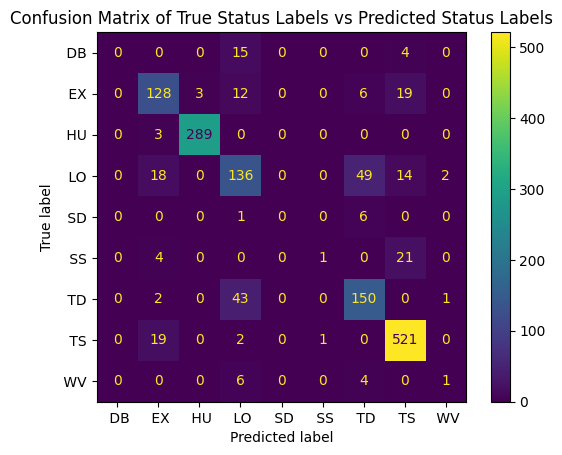

In [14]:
svc_cm = confusion_matrix(y_test_svc, predict, labels=svc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm, display_labels=svc_model.classes_)

disp.plot()
plt.title('Confusion Matrix of True Status Labels vs Predicted Status Labels')
plt.show()